<a href="https://colab.research.google.com/github/josedalvik/datascience_python1_tarea5/blob/main/Tarea_5_vectores_en_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ejercicio** : en data science y programación científica es común necesitar vectores con valores dentro de cierto intervalo, pero con sub-intervalos internos con diference espaciamiento ,por ejemplo:

[0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.7 , 0.8 , 0.9 , 1.  ]
       
El primer sub-intervalo incrementa de 0.1 en 0.1 , el segundo de 0.01 en 0.01 , y el tercero de 0.1 en 0.1 nuevamente.

Usando unicamente NumPy crea un vector de este tipo con el nombre xs .

**nota**: no es permitido usar ciclos, debe realizarse con operaciones "vectorizadas" de numpy

In [1]:
import numpy as np
# tu codigo aqui (~ 5 lineas de codigo):
a = np.arange(0, 1.1, 0.1)            # [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.]
b = ((a*0.1)[1:]) + a[-1]             # [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ] + 1.
c = np.arange(b[-1] + 0.1, 2.1, 0.1)  # [1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9 2. ]
xs = np.hstack(( a, b, c))
xs

array([0.  , 0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1.  ,
       1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.2 ,
       1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2.  ])

**Ejercicio (parte de tarea)** En este caso usamos un ciclo  para ejemplificar pero ya hemos mencionado que debemos evitarlos siempre que sea posible y usar operaciones "vectorizadas" ya que es mucho mas rápido al utilizar  código pre-compilado de C, en este ejercicio debemos remplazar el calculo de ys para hacerlo de manera "vectorizada" y eliminar el ciclo for. 

**tip**: usar slicing

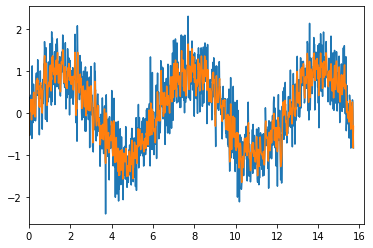

In [2]:
import matplotlib.pyplot as plt

sample_points = 1000
inicio_intervalo = 0

ruido = 0.5*np.random.randn(sample_points) 
x = np.linspace(inicio_intervalo,5*np.pi,sample_points) 
y = np.sin(x) + ruido

ys = (y[:-2] + y[1:-1] + y[2:]) / 3
ys = np.insert(ys, 0, y[0])
ys = np.insert(ys, -1, y[-1])

plt.plot(x,y)
plt.plot(x,ys)
plt.xlim(inicio_intervalo, 5*np.pi + 0.5)
plt.show()

**Ejercicio** Para calcular la información de una distribución de probabilidad necesitamos calcular el producto entre la información de cada posible x y su probabilidad , cada uno de estos elementos nos indica cuanta incerteza aporta cada x a la entropía de la distribución. Crea una función que calcule esto, debe recibir un vector representando a la dist. de probabilidad y devoler otro vector con el termino de entropía para cada x. Por ejemplo:

calcular_entropia([0.25,0.75])

Debe resultar en :

[0.5    ,    0.31127812]

**Nota**: la entropía es la suma sobre estos valores, en este caso no calculamos la entropía,unicamente los termimos de su sumatoria. La entropía es:

$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

In [3]:
# tu codigo aqui (~ 4 lineas de codigo)

import numpy as np
def calcular_entropia(px):
    return px * np.log2(px) * -1 

calcular_entropia([0.25,0.75])

array([0.5       , 0.31127812])

**2)** 

A partir de la información en un data warehouse con un modelo de  datos el valor de clientes en el tiempo se ha determinado un modelo predictivo  no lineal que estima cuanta ganancia ha generado cierto cliente en 5 años en base a lo que ha gastado en su primer mes como cliente. 

El modelo tiene la forma:

$$g(x) = (x^{3} + 2x^{2} + e^{0.0001x} -\sqrt{2x})/50$$

Crear una función que calcule la ganancia para valores de gasto de nuevos clientes:

In [4]:
def g(x): #<- vector
    
    ganancia = (np.power(x,3) + 2.0*(np.power(x,2.0))+np.exp(0.0001*x) - np.sqrt(2.0*x))/50
    
    return ganancia # <- vector del mismo tamaño que x
    
gastos = np.array([100,50,25,100]) #vector
ganancia = g(gastos)

print("Ganancias",ganancia)

Ganancias [20399.73735829  2599.82010025   337.37862871 20399.73735829]


**Ejercicio** : se ha determinado también que hay costos asociados a la comunicación y relación con los clientes(llamadas,mensajes electrónicos,etc) y que estos también tienen alta correlación con el monto que estos gastan en su primer més siguiendo el modelo:
$$c(x) = (x^{2} + x + log (0.0001x)-\sqrt{0.54x})/100$$

Cree una función para calcular este modelo sobre valores de de gasto de nuevos clientes , y luego cree una función  **ganancia_neta(x,g,c)** donde:
* x = vector conteniendo los valores de gasto del primer mes para nuevos clientes.
* g = función que estima la ganancia en función de x
* c = función que estima el costo en función de x

La función realiza el calculo simple **g(x) - c(x)** , ya que es posible que los modelos cambien en el tiempo es común recibir como parámetro el modelo o modelos hijos de un modelo mas grande , en este caso eso se logra recibiendo como parámetro las funciones de ganancia y costo.

In [5]:
def ganancia2(x):
  return np.power(x,2)

def costos(x):
  return ( ( np.power(x,2.0) + x + np.log2( x * 0.0001 ) - np.sqrt(x * 0.54) ) / 100)

In [6]:
def ganancia_neta(x,g,c):
  return g(x) - c(x)

x = np.array([5, 3, 8, 11])
ganancia_neta(x,ganancia2,costos)

array([ 24.82608952,   9.00975542,  63.40366173, 119.80265492])

In [7]:
x

array([ 5,  3,  8, 11])

**Ejercicio** Usando argmax crear una función mode(x) para calcular la moda de un vector x , esta función debe devolver una tupla de 2 elementos de la forma:

(valor,conteo)

**tip** investigar y auxiliarse de otras funciones de numpy y np.argmax, no olvidar trabajar todo vectorizado, sin ciclos.

In [8]:
import numpy as np
def mode(x):
    ## tu codigo aqui (~ 3 lineas de codigo):
    
    conteo = np.bincount(x)
    indice = np.argmax(conteo)
    return x[indice-1], conteo[indice]

print(x)
print(mode(x))

[ 5  3  8 11]
(8, 1)


In [9]:
dist_a = np.array([0.3,0.5,0.2])

In [10]:
import numpy as np
  
  
# create array
x = np.array([1,2,3,4,5,1,2,1,1,1, 10])
print("Original array:")
print(x)
  
print("Most frequent value in the above array:")
print(np.bincount(x))


Original array:
[ 1  2  3  4  5  1  2  1  1  1 10]
Most frequent value in the above array:
[0 5 2 1 1 1 0 0 0 0 1]


**Ejercicio** : crear una función para calcular la entropía  de una distribución de probabilidad representada como un vector.
$$S = -\sum_i^nP(x_{i})log_{2}P(x_{i})$$

**Nota**: a diferencia del ejercicio anterior donde solo calculamos los términos de la entropía, en este caso  si calculamos el valor completo de la entropía, que como mencionamos es una medida de incerteza en una distribución de probabilidad.

**recordatorio**: no usar ciclos solo operaciones vectorizadas.

In [11]:
# tu codigo aqui (~ 3 lineas de codigo)
import numpy as np
def calcular_entropia(px):
    return np.sum( px * np.log2(px) * -1 )

calcular_entropia([0.25,0.75])

0.8112781244591328

**Ejercicio**: En ML usamos la entropía cruzada como una forma de medir que tan bueno es un modelo de variables discretas a través de comparar la distribución de probabilidad que el modelo produce o predice, vs la distribución de probabilidad real dada por los datos de entrenamiento.

Podemos ver el siguiente ejemplo que define la forma en que se calcula la entropía cruzada y nos muestra un caso específico:

<img src="https://image.slidesharecdn.com/publishintroductiontodeeplearninginpythonandmatlab1-160502102437/95/introduction-to-deep-learning-in-python-and-matlab-54-638.jpg?cb=1462185644">

En este caso interpretamos así: El problema consiste en un modelo o algoritmo de ML que debe producir un vector de 3 elementos indicando la probabilidad de que ciertos datos X pertenezcan a una de 3 categorías.

* El modelo de ML produce un vector que indica que estima un 70% de probabilidad de que se trate de la categoría 0, 20% de probabilidad de que se trate de la categoría 1 y 10% de que se trate de la categoría 2.
* Los datos reales nos dicen que se trataba de un caso donde con total certeza se sabe que se trata de la categoría 0
* La entropía cruzada(a calcular en el ejercicio) nos indica que tan buena es la estimación del modelo, una EC de 0 es un modelo perfecto(en este caso un modelo que predice 100% de prob para la clase 0)

**Nota** 
* Aun que para calcular la entropía usamos logaritmos en base 2, en ML para calcular la entropía cruzada se usa logaritmo natural ya que con este se cumple el proposito **estimar que tanto se alejan las predicciones del modelo de ML de los datos reales** y es comunmente mas rápido de calcular en la computadora.
* Ya que estamos trabajando con vectores que representan distribuciones de probabilidad , podemos toparnos con lo que se conoce como : **sparse vectors**(vectores donde la mayoría de elementos son 0), esto puede producir problemas ya que le logaritmo de 0 no esta definido, tu solución debe tomar en cuenta esto y evitar que devuelva "nan"

In [12]:
def cross_entropy(Y,Y_hat):
    ##tu codigo aqui (~ 1 lineas de codigo)
    return np.nansum( Y * np.log(Y_hat) ) * -1

y  = np.array([1.0,0,0])
y_hat = np.array([0.7,0.2,0.1]) # <- resultado de algun modelo predictivo

cross_entropy(y,y_hat)

0.35667494393873245

**ejercicio** : crear una función que reciba como parámetro un vector x y calcule su magnitud o norma(euclidiana o L2) ,luego usarla para evaluar 2 vectores que representan los errores generados por 2 modelos de machine learning y concluir cual de los 2 modelos es mejor.

In [13]:
import numpy as np
def magnitud(x):
    ## tu codigo aqui (~ 1 linea de codigo)
    return np.sqrt( np.sum(np.power(x,2)) ) # raiz cuadrada

errores_modelo1 = np.array([1,2,1,2]) #
errores_modelo2 = np.array([0,1,1,2]) #

em1 = magnitud(errores_modelo1)
em2 = magnitud(errores_modelo2)

print(em1)
print(em2)
# elegir el mejor modelo con una condicional(if)

if em1 > em2:
  print("Modelo elegido: ", errores_modelo1)
else:
  print("Modelo elegido: ", errores_modelo2)


3.1622776601683795
2.449489742783178
Modelo elegido:  [1 2 1 2]


**ejercicio** Usando la función del ejercicio anterior, crea otra función normalizar(x) que reciba de parámetro un vector x aplique normalización sobre este, el resultado debe ser un nuevo vector del tamaño de x cuya magnitud es igual a 1.0

In [14]:
def normalizar(x, magnitud):
    ## tu codigo aqui (~ 3 linea de codigo)
    return x / magnitud(x)

model1_norm = normalizar(errores_modelo1, magnitud)
model2_norm = normalizar(errores_modelo2, magnitud)

print(model1_norm)
print(magnitud(model1_norm))
print(model2_norm)
print(magnitud(model2_norm))

[0.31622777 0.63245553 0.31622777 0.63245553]
1.0
[0.         0.40824829 0.40824829 0.81649658]
1.0


**Ejercicio aplicado en DS**
Se tiene una red neuronal sencilla(y simplificada) como la de la siguiente imagen:
<img src="https://www.oreilly.com/library/view/practical-convolutional-neural/9781788392303/assets/246151fb-7893-448d-b9bb-7a87b387a24b.png">

Donde:
* INPUT LAYER: un vector X de tamaño = 2 que representa los datos de entrada
* HIDDEN_LAYER :capa oculta con 2 neuronas definidas por los vectores:
    * HL1 = [0.25,0.37]
    * HL2 = [-8,14]
* OUTPUT_LAYER = capa de salida definida por el vector [4,9]

Crear una funcion neural_network(X) para calcular:
* Calcule la salida de cada neurona en la capa intermedia aplicada a la capa de entrada.
* Use el resultado del paso anterior como entrada para la neurona en la capa de salida

Asumiendo que cada neurona identifica la similitud entre su entrada y la caracteística que representa concluir:
* Para cada vector de entrada Xi , cual neurona intermedia busca la característica que mas se parece a X.
* Cual vector de entrada Xi produce una activación alta(salida alta) en la capa de salida.

In [15]:
# Aplicar la red neuronal sobre los siguientes datos X

def red_neuronal(x):
  hl1 = np.array([0.25, 0.37])
  hl2 = np.array([-8, 14])
  ol = np.array([4, 9])
  h = np.array( [np.dot(x, hl1), np.dot(hl2, x)] )
  return np.dot( ol, h)

X1 = np.array([0.50,0.72])
X2 = np.array([-4,7])
X3 = np.zeros_like(X2)
X4 = np.ones_like(X1)
X5 = np.random.randn(X1.shape[0])

print( red_neuronal(X1) )
print( "Salida más alta: ", red_neuronal(X2) ) #Salida más alta
print( red_neuronal(X3) )
print( red_neuronal(X4) )
print( red_neuronal(X5) )

56.2856
Salida más alta:  1176.36
0.0
56.48
-89.72016162521803


**Ejercicio aplicado en DS**: la correlación cruzada es una medida de similitud entre 2 funciones como resultado de "desplazar" una sobre la otra, comunmente es usada para encontrar características relevantes en una función desconocida o no controlada.

En procesamiento de señales por ejemplo es usada para buscar y/o filtrar en una señal que varia en el tiempo cierta caracaterística de interés. Aveces es llamada también "sliding dot product" consiste en aplicar en cada punto de una función F el producto punto con cierta función G(comunmente mas corta) y luego "deslizar" G a un nuevo punto de la función, el resultado es una nueva función H que se interpreta como :**cuanto se parece** en cada punto la función F a la característica G. 

<img src="https://i.makeagif.com/media/11-25-2015/LZ9Ufj.gif">

En este ejercicio usamos correlación cruzada para calcular las medias moviles promediando 3 puntos que ya vimos en otro ejemplo:

El primer paso es definir la función G que define el "filtro" a aplicar, para este caso consiste simplemente en un vector con 3 elementos donde cada elemento corresponde a 1/3, luego debemos aplicar el producto punto sobre cada punto de la función o datos originales(en este ejemplo llamados x) a traves aplicar el producto punto en cada elemento "corriendolo" de uno en uno

In [16]:
ruido = 0.1*np.random.randn(15) #el ruido comunmente se debe a aleatoriedad o captura no exacta de info.
x = np.linspace(0,2*np.pi,15) 
y = np.sin(x) + ruido

filtro = np.array([1/3,1/3,1/3]) #para lograr las medias moviles a traves de correlacion cruzada

## tu codigo aqui (~ 3 linea de codigo)
y = y + filtro[0]
print( np.dot(x, y ) )
y = y + filtro[1]
print( np.dot(x, y ) )
y = y + filtro[2]
print( np.dot(x, y ) )

2.2580176301535166
17.965980898102483
33.67394416605144


**Ejercicio** dado el vector x, usar operadores lógicos sobre vectores y acceso a  elementos usando vectores booleanos , escribir un programa que calcule eun nuevo vector z conteniendo el valor absoluto de el vector x.

**nota** No se puede usar np.abs() ni ciclos

**tip** usar un vector booleano para saber que elementos son negativos y deben ser multiplicados por -1

In [17]:
x = np.linspace(-2,2,9)

## tu codigo aqui (~ 4 linea de codigo)
### ver cuales elementos son negativos <- vector booleanos
### multiplicar esos elementos por -1
### usando el vector del rpimer paso remplazar los que eran negativos por su valor calculado en paso 2

booleanos = x < 0
absolutos = x[booleanos] * -1
z = x.copy()
z[booleanos] = absolutos
z

array([2. , 1.5, 1. , 0.5, 0. , 0.5, 1. , 1.5, 2. ])

**ejercicio** Implementar la función:
$$h(x) = \begin{cases}0 & x< 0\\1 & 0<=x <=1\\0 & x> 1\end{cases}$$

Esta debe funcionar para vectores de cualquier tamaño x:

def h(x):

    ...

**nota** debe ser implementada sin ciclos o ifs 

In [18]:
def h(x):
    ## tu codigo aqui (~ 3 linea de codigo)
    
    h = np.ones(len(x))
    ceros1 = x < 0
    ceros2 = x > 1
    h[ceros1] = 0
    h[ceros2] = 0

    ##
    return h

x = np.array([0.1,-2,0.5,5])
print(h(x))

[1. 0. 1. 0.]


**Ejercicio**

Usando select implementar una función k(x) con la siguiente definición:
$$k(x) = \begin{cases}-x & x< 0\\x^{3}  &0<=x<1\\x^{2}  &1<=x<2\\4  &otherwise\end{cases}$$

In [19]:
def k(x):
  condiciones = [x<0, x<1, x<2]
  resultados = [-x, x**3, x**2]
  return np.select(condiciones, resultados, 4)

v = np.array([-1, 0, 0.5, 1, 1.5, 2, 3])

print(v)
print(k(v))

[-1.   0.   0.5  1.   1.5  2.   3. ]
[1.    0.    0.125 1.    2.25  4.    4.   ]


**Ejercicio** 
Investigar piecewise y:
*  Usarlo para implementar la función anterior de manera eficiente
*  Usar piscewise para implementar la función:

$$m(x) = \begin{cases}e^{2x} & x< 0\\1  &0<=x<1\\e^{1-x}  &x>=1\\\end{cases}$$

Nuevamente, sin utilizar ciclos ni ifs

In [20]:
def m(x):
  return np.piecewise(x, [x < 0, x < 1, x >= 0], [ lambda x: np.exp(2*x), 1, lambda x: np.exp(1-x) ])

v = np.array([-1, 0, 0.5, 1])
print(v)
m(v)

[-1.   0.   0.5  1. ]


array([1.        , 2.71828183, 1.64872127, 1.        ])

#### Investigar

* Proyección vectorial
    * Definir una función para calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo, tip: Hay un algoritmo de ML cuyo nombre puede ser  útil.
* Producto cruz
    * calculo en numpy
    * interpretación
    * aplicación o caso de uso en DS u otras ciencias de tu interés: solo se necesita nombrar el caso de uso, no desarrollarlo o programarlo

In [25]:
# Proyección vectorial

# Cálculo en numpy
def calcular_proyeccion(u, v):
  abs = np.sqrt(sum(v**2))
  return ( np.dot(u, v)/ abs**2 ) * v

u = np.array([2, 0])
v = np.array([3, -4])

print(calcular_proyeccion(u, v))

# Interpretación

# La proyección vectorial es el vector resultante de la proyección de u sobre v. Este se obtiene al obtener el módulo del vector proyección, y multiplicarlo
# por el vector unitario de v

# Aplicación

# Proceso de ortogonalización de Gram-Schmidt


[ 0.72 -0.96]


In [26]:
# Producto cruz

def calcular_producto_cruz(u, v):
  return np.cross(u, v)

u = np.array([2, 0])
v = np.array([3, -4])

print(calcular_producto_cruz(u, v))

# Interpretación

# El producto cruz es perpendicular a los vecotres u y v, y su magnitud es igual al área del paralelogramo formado por ambos vectores.

# Aplicación

# Cálculo de coheficiente de correlación de dos variables

-8
